# NM

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai; fastai.__version__
print(fastai.__version__)
from fastai import *
from fastai.vision.all import * 
from fastai.tabular.all import *
from fastai.callback.all import *
from fastai.data import *
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import StratifiedKFold
from fastcore.foundation import L
from efficientnet_pytorch import EfficientNet
import collections

2.5.7


In [3]:
torch.cuda.set_device(0)
torch.cuda.current_device()

0

In [4]:
bs = 16
img_size=96
n_splits = 5
lr=0.001
#np.random.seed(2)

In [5]:
#path="/media/df4-dafna/Rotem_Orad/NM_DL_forFastAI/"
#img_path="/media/df4-dafna/Rotem_Orad/NM_DL_forFastAI/images/"

               Image     Type
0  BEAT_0180_sl1.png  Control
1  BEAT_0180_sl2.png  Control
2  BEAT_0180_sl3.png  Control
3  BEAT_0185_sl1.png  Control
4  BEAT_0185_sl2.png  Control
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,3.071861,2.004490,0.192308,00:03
1,3.014956,2.144052,0.205128,00:01
2,2.826518,2.141420,0.230769,00:01
3,2.838074,2.048188,0.269231,00:01
4,2.727671,1.940005,0.307692,00:01
5,2.677911,1.942741,0.294872,00:01
6,2.573252,1.956112,0.294872,00:01
7,2.491422,1.959970,0.333333,00:01
8,2.413448,1.899441,0.358974,00:01
9,2.365026,1.874561,0.346154,00:01


Better model found at epoch 0 with accuracy value: 0.19230769574642181.
Better model found at epoch 1 with accuracy value: 0.20512820780277252.
Better model found at epoch 2 with accuracy value: 0.23076923191547394.
Better model found at epoch 3 with accuracy value: 0.26923078298568726.
Better model found at epoch 4 with accuracy value: 0.3076923191547394.
Better model found at epoch 7 with accuracy value: 0.3333333432674408.
Better model found at epoch 8 with accuracy value: 0.3589743673801422.
Better model found at epoch 26 with accuracy value: 0.41025641560554504.
Better model found at epoch 45 with accuracy value: 0.43589743971824646.
Better model found at epoch 57 with accuracy value: 0.4743589758872986.


epoch,train_loss,valid_loss,accuracy,time
0,0.964971,1.650918,0.487179,00:01
1,0.854477,1.574795,0.423077,00:01
2,0.768314,1.524756,0.410256,00:01
3,0.739318,1.522617,0.474359,00:01
4,0.704810,1.537903,0.487179,00:01
5,0.677126,1.635005,0.512821,00:01
6,0.672531,1.804710,0.474359,00:01
7,0.666174,1.670915,0.461538,00:01
8,0.733687,2.140317,0.423077,00:01
9,0.732171,2.529569,0.435897,00:01


Better model found at epoch 0 with accuracy value: 0.4871794879436493.
Better model found at epoch 5 with accuracy value: 0.5128205418586731.
Better model found at epoch 16 with accuracy value: 0.5256410241127014.
Better model found at epoch 17 with accuracy value: 0.6025640964508057.
Better model found at epoch 39 with accuracy value: 0.6538461446762085.
Better model found at epoch 46 with accuracy value: 0.6794871687889099.
Better model found at epoch 67 with accuracy value: 0.7179487347602844.
Better model found at epoch 68 with accuracy value: 0.7307692170143127.
Better model found at epoch 76 with accuracy value: 0.7435897588729858.
Better model found at epoch 78 with accuracy value: 0.7564102411270142.
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,2.899924,1.974431,0.192308,00:01
1,2.832410,1.864977,0.282051,00:01
2,2.770659,1.899769,0.205128,00:01
3,2.806364,1.980024,0.243590,00:01
4,2.728207,1.921827,0.217949,00:01
5,2.621490,1.893576,0.205128,00:01
6,2.548441,1.856576,0.243590,00:01
7,2.447714,1.876464,0.230769,00:01
8,2.394275,1.830888,0.320513,00:01
9,2.388049,1.762463,0.320513,00:01


Better model found at epoch 0 with accuracy value: 0.19230769574642181.
Better model found at epoch 1 with accuracy value: 0.28205129504203796.
Better model found at epoch 8 with accuracy value: 0.3205128312110901.
Better model found at epoch 13 with accuracy value: 0.3333333432674408.
Better model found at epoch 14 with accuracy value: 0.3717948794364929.
Better model found at epoch 15 with accuracy value: 0.39743590354919434.
Better model found at epoch 27 with accuracy value: 0.43589743971824646.
Better model found at epoch 35 with accuracy value: 0.4743589758872986.
Better model found at epoch 59 with accuracy value: 0.4871794879436493.
Better model found at epoch 60 with accuracy value: 0.5128205418586731.
Better model found at epoch 74 with accuracy value: 0.5256410241127014.
Better model found at epoch 77 with accuracy value: 0.5512820482254028.


epoch,train_loss,valid_loss,accuracy,time
0,0.745823,1.501948,0.500000,00:01
1,0.742840,1.599851,0.474359,00:01
2,0.686082,1.594955,0.461538,00:01
3,0.620418,1.606694,0.461538,00:01
4,0.565114,1.593918,0.474359,00:01
5,0.604636,1.604890,0.487179,00:01
6,0.580398,1.694846,0.474359,00:01
7,0.586807,1.524248,0.487179,00:01
8,0.662130,1.987710,0.448718,00:01
9,0.714190,1.949960,0.512821,00:01


Better model found at epoch 0 with accuracy value: 0.5.
Better model found at epoch 9 with accuracy value: 0.5128205418586731.
Better model found at epoch 11 with accuracy value: 0.5769230723381042.
Better model found at epoch 27 with accuracy value: 0.5897436141967773.
Better model found at epoch 28 with accuracy value: 0.6025640964508057.
Better model found at epoch 40 with accuracy value: 0.6410256624221802.
Better model found at epoch 48 with accuracy value: 0.6794871687889099.
Better model found at epoch 55 with accuracy value: 0.7051281929016113.
Better model found at epoch 64 with accuracy value: 0.7307692170143127.
Better model found at epoch 71 with accuracy value: 0.7435897588729858.
Better model found at epoch 77 with accuracy value: 0.7692307829856873.
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,2.835821,1.852462,0.307692,00:01
1,2.772410,1.952715,0.205128,00:01
2,2.712569,1.830944,0.179487,00:01
3,2.672659,1.781793,0.282051,00:01
4,2.574026,1.793127,0.320513,00:01
5,2.499672,1.734767,0.333333,00:01
6,2.496561,1.767455,0.333333,00:01
7,2.396812,1.702153,0.333333,00:01
8,2.315703,1.745012,0.320513,00:01
9,2.345810,1.734421,0.333333,00:01


Better model found at epoch 0 with accuracy value: 0.3076923191547394.
Better model found at epoch 4 with accuracy value: 0.3205128312110901.
Better model found at epoch 5 with accuracy value: 0.3333333432674408.
Better model found at epoch 13 with accuracy value: 0.3461538553237915.
Better model found at epoch 19 with accuracy value: 0.3589743673801422.
Better model found at epoch 36 with accuracy value: 0.3717948794364929.
Better model found at epoch 37 with accuracy value: 0.38461539149284363.
Better model found at epoch 42 with accuracy value: 0.43589743971824646.
Better model found at epoch 43 with accuracy value: 0.4871794879436493.
Better model found at epoch 47 with accuracy value: 0.5256410241127014.


epoch,train_loss,valid_loss,accuracy,time
0,1.071084,1.428818,0.423077,00:01
1,0.970794,1.658538,0.435897,00:01
2,0.893778,1.623990,0.423077,00:01
3,0.853785,1.637874,0.410256,00:01
4,0.818022,1.869697,0.410256,00:01
5,0.735548,1.771810,0.358974,00:01
6,0.731000,2.092741,0.410256,00:01
7,0.751488,2.121343,0.410256,00:01
8,0.782610,1.908134,0.397436,00:01
9,0.852316,2.584777,0.435897,00:01


Better model found at epoch 0 with accuracy value: 0.42307692766189575.
Better model found at epoch 1 with accuracy value: 0.43589743971824646.
Better model found at epoch 11 with accuracy value: 0.44871795177459717.
Better model found at epoch 13 with accuracy value: 0.4871794879436493.
Better model found at epoch 15 with accuracy value: 0.5384615659713745.
Better model found at epoch 22 with accuracy value: 0.5641025900840759.
Better model found at epoch 40 with accuracy value: 0.5897436141967773.
Better model found at epoch 48 with accuracy value: 0.6025640964508057.
Better model found at epoch 50 with accuracy value: 0.6282051205635071.
Better model found at epoch 55 with accuracy value: 0.6794871687889099.
Better model found at epoch 78 with accuracy value: 0.692307710647583.
Better model found at epoch 86 with accuracy value: 0.7051281929016113.
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting 

epoch,train_loss,valid_loss,accuracy,time
0,2.822680,1.953380,0.205128,00:01
1,2.741228,1.994262,0.217949,00:01
2,2.731348,1.879671,0.320513,00:01
3,2.675329,1.955462,0.294872,00:01
4,2.636333,2.079198,0.217949,00:01
5,2.561973,2.019862,0.243590,00:01
6,2.494465,2.018696,0.269231,00:01
7,2.427440,1.930141,0.282051,00:01
8,2.394446,1.904020,0.320513,00:01
9,2.280209,1.919718,0.307692,00:01


Better model found at epoch 0 with accuracy value: 0.20512820780277252.
Better model found at epoch 1 with accuracy value: 0.21794871985912323.
Better model found at epoch 2 with accuracy value: 0.3205128312110901.
Better model found at epoch 13 with accuracy value: 0.39743590354919434.
Better model found at epoch 17 with accuracy value: 0.41025641560554504.
Better model found at epoch 18 with accuracy value: 0.42307692766189575.
Better model found at epoch 23 with accuracy value: 0.43589743971824646.
Better model found at epoch 56 with accuracy value: 0.44871795177459717.
Better model found at epoch 62 with accuracy value: 0.4615384638309479.
Better model found at epoch 67 with accuracy value: 0.4871794879436493.
Better model found at epoch 93 with accuracy value: 0.5.


epoch,train_loss,valid_loss,accuracy,time
0,0.629264,1.670703,0.423077,00:01
1,0.568299,1.731843,0.512821,00:01
2,0.564330,1.744450,0.512821,00:01
3,0.563712,1.891207,0.512821,00:01
4,0.550654,1.805369,0.500000,00:01
5,0.564002,1.547336,0.461538,00:01
6,0.572515,1.830726,0.487179,00:01
7,0.614540,1.819489,0.461538,00:01
8,0.606007,2.676664,0.410256,00:01
9,0.652625,1.972847,0.512821,00:01


Better model found at epoch 0 with accuracy value: 0.42307692766189575.
Better model found at epoch 1 with accuracy value: 0.5128205418586731.
Better model found at epoch 20 with accuracy value: 0.5512820482254028.
Better model found at epoch 27 with accuracy value: 0.5897436141967773.
Better model found at epoch 34 with accuracy value: 0.6153846383094788.
Better model found at epoch 37 with accuracy value: 0.6282051205635071.
Better model found at epoch 56 with accuracy value: 0.6794871687889099.
Better model found at epoch 68 with accuracy value: 0.7051281929016113.
Better model found at epoch 69 with accuracy value: 0.7435897588729858.
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,3.194891,2.135598,0.179487,00:01
1,3.033385,2.065226,0.179487,00:01
2,2.958600,2.041536,0.166667,00:01
3,2.857126,1.894140,0.179487,00:01
4,2.727857,1.807130,0.205128,00:01
5,2.599153,1.764446,0.179487,00:01
6,2.504885,1.717003,0.256410,00:01
7,2.452406,1.731927,0.294872,00:01
8,2.420573,1.653246,0.230769,00:01
9,2.350517,1.653276,0.243590,00:01


Better model found at epoch 0 with accuracy value: 0.1794871836900711.
Better model found at epoch 4 with accuracy value: 0.20512820780277252.
Better model found at epoch 6 with accuracy value: 0.25641027092933655.
Better model found at epoch 7 with accuracy value: 0.29487180709838867.
Better model found at epoch 12 with accuracy value: 0.3076923191547394.
Better model found at epoch 13 with accuracy value: 0.3333333432674408.
Better model found at epoch 14 with accuracy value: 0.3461538553237915.
Better model found at epoch 16 with accuracy value: 0.38461539149284363.
Better model found at epoch 19 with accuracy value: 0.39743590354919434.
Better model found at epoch 23 with accuracy value: 0.41025641560554504.
Better model found at epoch 28 with accuracy value: 0.43589743971824646.
Better model found at epoch 29 with accuracy value: 0.4743589758872986.
Better model found at epoch 32 with accuracy value: 0.4871794879436493.
Better model found at epoch 44 with accuracy value: 0.5.
Bett

epoch,train_loss,valid_loss,accuracy,time
0,0.681390,1.304847,0.500000,00:01
1,0.700846,1.421578,0.474359,00:01
2,0.715463,1.502721,0.448718,00:01
3,0.652786,1.522953,0.487179,00:01
4,0.613121,1.510881,0.487179,00:01
5,0.609219,1.565711,0.448718,00:01
6,0.662291,1.576241,0.538462,00:01
7,0.676346,1.669795,0.474359,00:01
8,0.689209,1.752954,0.500000,00:01
9,0.710906,1.826779,0.448718,00:01


Better model found at epoch 0 with accuracy value: 0.5.
Better model found at epoch 6 with accuracy value: 0.5384615659713745.
Better model found at epoch 14 with accuracy value: 0.5769230723381042.
Better model found at epoch 22 with accuracy value: 0.6025640964508057.
Better model found at epoch 39 with accuracy value: 0.6153846383094788.
Better model found at epoch 46 with accuracy value: 0.6538461446762085.
Better model found at epoch 48 with accuracy value: 0.6794871687889099.
Better model found at epoch 63 with accuracy value: 0.7307692170143127.
Better model found at epoch 64 with accuracy value: 0.7435897588729858.
Better model found at epoch 69 with accuracy value: 0.7564102411270142.
Better model found at epoch 71 with accuracy value: 0.7692307829856873.
Better model found at epoch 73 with accuracy value: 0.7820512652397156.
Better model found at epoch 77 with accuracy value: 0.807692289352417.
Better model found at epoch 79 with accuracy value: 0.8333333134651184.


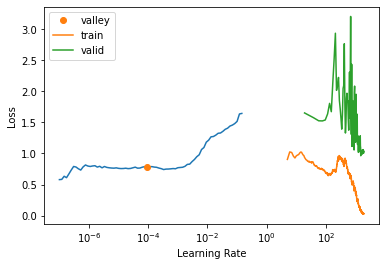

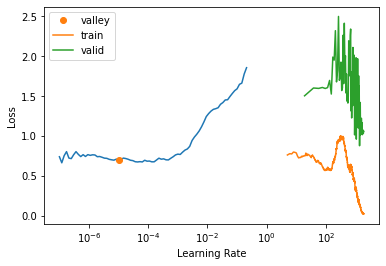

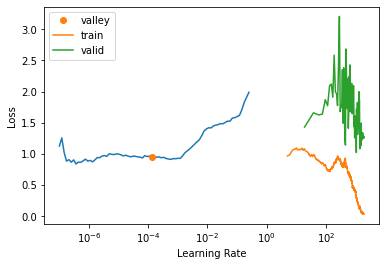

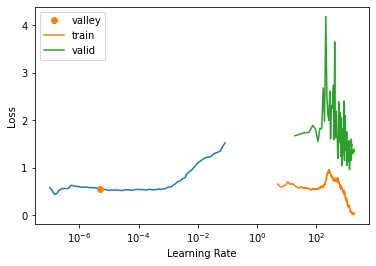

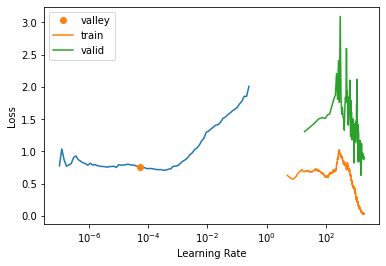

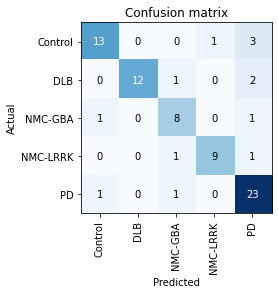

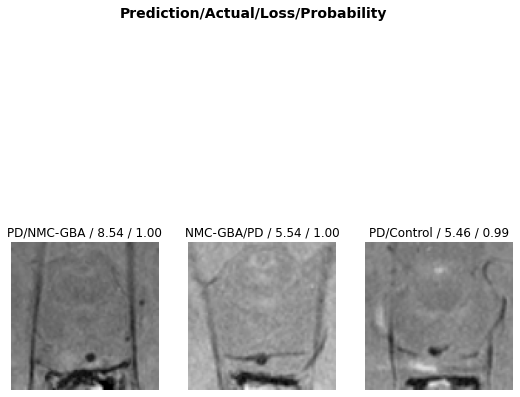

In [6]:
path= r'OneDrive/NM_DL_forFastAI/'
img_path=r'OneDrive/NM_DL_forFastAI/images/'
df = pd.read_csv(path+'data_new.csv')
print(df.head())
from efficientnet_pytorch import EfficientNet
model_name = 'efficientnet-b0'
def getModel(pret,**kwargs):
    model = EfficientNet.from_pretrained(model_name)
    model._fc = nn.Linear(model._fc.in_features,data.c)
    return model

#Split the data between the training and the validation set
X = df['Image']
y = df['Type']
groups = df['Type']

kf = StratifiedKFold(n_splits=n_splits, shuffle=False)
splits = list(kf.split(X, y))
for train_index, test_index in kf.split(X, y, groups=groups):
    X_train, X_val = np.array(df)[train_index], np.array(df)[test_index]
    y_train, y_val = y[train_index], y[test_index]
    # Prepare the selected fold
    train = X_train, y_train
    test = X_val, y_val
    train_list = [list(x) for x in train]
    test_list  = [list(x) for x in test]
    data_fold = ImageDataLoaders.from_df(df, path=img_path, suffix='', batch_tfms = aug_transforms(size=img_size, xtra_tfms= Normalize.from_stats(*imagenet_stats)), bs=bs, splitter=IndexSplitter(test_index))
    learn = cnn_learner(data_fold, models.resnet18,metrics = accuracy).to_fp16()
    learn.fit_one_cycle(n_epoch=100, lr_max=lr, cbs=[SaveModelCallback(monitor='accuracy', reset_on_fit = True)]) # save the best model
    learn.save('stage-1')
    learn.unfreeze() 
    learn.lr_find()
    learn.fit_one_cycle(n_epoch=100, lr_max=lr, cbs=[SaveModelCallback(monitor='accuracy', reset_on_fit = True)]) # save the best model
    learn.save('stage-2')
    learn.recorder.plot_loss()

learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(3, figsize=(9,9))

# Data visualising 



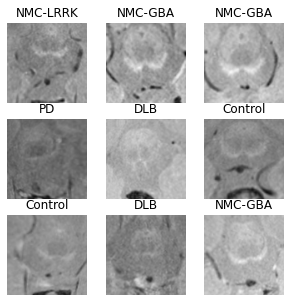

In [8]:
data_fold.show_batch(nrows=3, figsize=(5,5))

In [394]:
print(data.items)
items = data.items['Type']
occurance_count = collections.Counter(items)
occurance_count = list(occurance_count.values())
classes = data.label_list.train.y.classes

# plotting
index = [i for i in range(len(occurance_count))]
plt.bar(index,occurance_count)
plt.xticks(index,[classes[i] for i in range(len(occurance_count))],rotation=45)
plt.ylabel('Label Count')
plt.xlabel('Label')
plt.title('Count of Labels')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'y'

# Model Training 


In [368]:
learn.unfreeze() 

In [369]:
learn.save('NSCC_SCC_model')

Path('OneDrive/NM_DL_forFastAI/images/models/NSCC_SCC_model.pth')

In [18]:
#Test Time Augmentation
# preds,targs = learn.TTA()
# accuracy(preds, targs).item()

# ROC

In [9]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.8333333134651184 %.


In [10]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9904761904761905


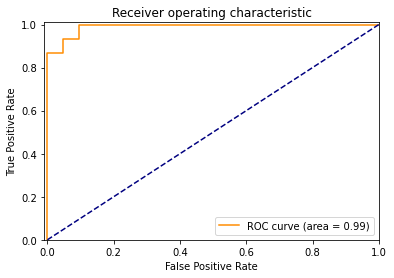

In [11]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_RGB.png')

# Model Evaluation

[]

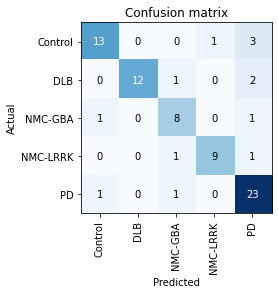

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
plt.savefig('confusion_matrix_RGB_V.png')
interp.most_confused(min_val=5)

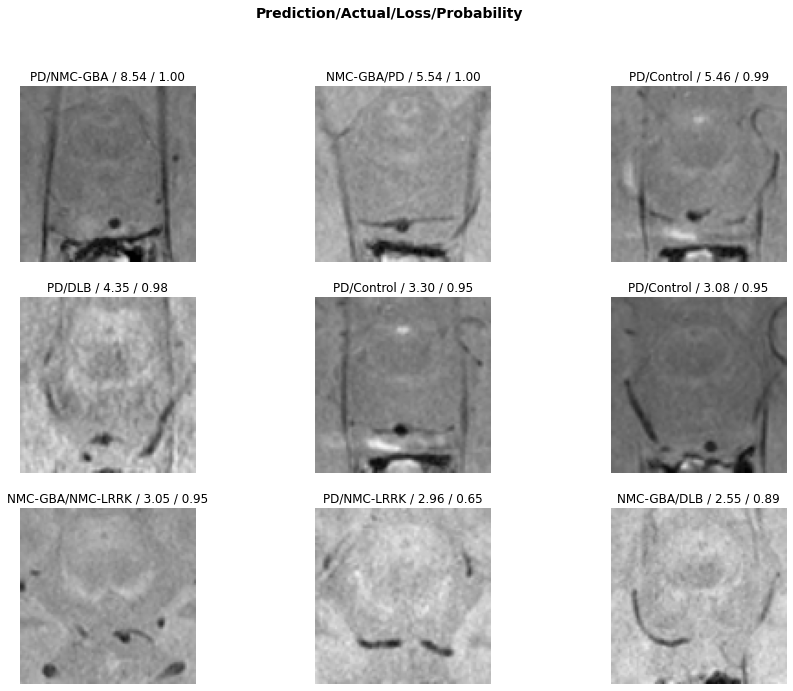

In [13]:
interp.plot_top_losses(25, figsize=(15,11))

# Inference on testdata

In [24]:
# learn.load('NSCC_SCC_model');

In [25]:
# CLASS = 'tags'
# ID = 'image_name'

In [26]:
# path="/media/D/users/moran/work/Projects/SCC_NSCC/csv/T1/Test/"
# df_test = pd.read_csv(path+"test_labels.csv")

# test = (ImageList.from_df(df_test, path, suffix='.png')
#         .split_none()
#        .label_from_df(cols=CLASS)
#        .databunch(bs=8))

# # test.show_batch()

# predictions = []
# predictionsC = []
# trues = df_test[CLASS].tolist()
# for true, img in zip(trues, df_test[ID].tolist()):
#     prediction = learn.predict(open_image(path+img+'.png'))
#     predictions.append(1 if str(prediction[0]) == true else 0)
#     predictionsC.append(prediction)
# sum(predictions)/len(predictions)

In [27]:
# pred_id = np.argmax(np.array([a[2].cpu().numpy() for a in predictionsC]), axis=1)
# class_id = ['NSCC', 'SCC']
# cladd_id_dict = dict([(i,a) for (a,i) in enumerate(class_id)])
# trues_id = np.array([cladd_id_dict[a] for a in trues])

# from sklearn.metrics import confusion_matrix
# cf = confusion_matrix(pred_id, trues_id)
# cf


In [28]:
# from mlxtend.plotting import plot_confusion_matrix
# import matplotlib.pyplot as plt
# import numpy as np

# binary1 = np.array(cf)

# fig, ax = plot_confusion_matrix(conf_mat=binary1)
# plt.show()
# plt.savefig('confusion_matrix_RGB_T.png')